In [1]:
# importing libraries used in cells below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import textwrap
from palettable.colorbrewer.qualitative import Pastel1_7
import warnings
# command to ignore one warning about deleting one option in future versions of one library
warnings.simplefilter(action='ignore', category=FutureWarning)

## Assignment 1 - Stackoverflow survey from 2022 - optional dataset
This dataset contains data which are described in .csv file ('survey_results_schema.csv')

### Loading data from csv

First of all, I will just load data from csv file with survey schema, results and list of European
countries which will be used later. On results I will use use .head() function to load first 5
records (which is made by default but we can change the number by enteringit between brackets).

In [2]:
df = pd.read_csv('survey_results_public.csv')
df_schema = pd.read_csv('survey_results_schema.csv')
eu_countries = pd.read_csv('Countries-Europe.csv')
df.head()

ResponseId                                         MainBranch  \
0           1                                      None of these   
1           2                     I am a developer by profession   
2           3  I am not primarily a developer, but I write co...   
3           4                     I am a developer by profession   
4           5                     I am a developer by profession   

            Employment                            RemoteWork  \
0                  NaN                                   NaN   
1  Employed, full-time                          Fully remote   
2  Employed, full-time  Hybrid (some remote, some in-person)   
3  Employed, full-time                          Fully remote   
4  Employed, full-time  Hybrid (some remote, some in-person)   

                           CodingActivities  \
0                                       NaN   
1  Hobby;Contribute to open-source projects   
2                                     Hobby   
3              I don’t code outside of work   
4                                     Hobby   

                                           EdLevel  \
0                                              NaN   
1                                              NaN   
2  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                           LearnCode  \
0                                                NaN   
1                                                NaN   
2  Books / Physical media;Friend or family member...   
3  Books / Physical media;School (i.e., Universit...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline LearnCodeCoursesCert  \
0                                                NaN                  NaN   
1                                                NaN                  NaN   
2  Technical documentation;Blogs;Programming Game...                  NaN   
3                                                NaN                  NaN   
4  Technical documentation;Blogs;Stack Overflow;O...                  NaN   

  YearsCode  ... TimeSearching TimeAnswering Onboarding ProfessionalTech  \
0       NaN  ...           NaN           NaN        NaN              NaN   
1       NaN  ...           NaN           NaN        NaN              NaN   
2        14  ...           NaN           NaN        NaN              NaN   
3        20  ...           NaN           NaN        NaN              NaN   
4         8  ...           NaN           NaN        NaN              NaN   

  TrueFalse_1 TrueFalse_2 TrueFalse_3           SurveyLength  \
0         NaN         NaN         NaN                    NaN   
1         NaN         NaN         NaN               Too long   
2         NaN         NaN         NaN  Appropriate in length   
3         NaN         NaN         NaN  Appropriate in length   
4         NaN         NaN         NaN               Too long   

                   SurveyEase ConvertedCompYearly  
0                         NaN                 NaN  
1                   Difficult                 NaN  
2  Neither easy nor difficult             40205.0  
3                        Easy            215232.0  
4                        Easy                 NaN  

[5 rows x 79 columns]

Now I will take a look on number of rows and columns in this loaded data (number of columns
should be equal to the number given in cell above)

In [3]:
print('Number of rows', len(df.index))
print('Number of columns', len(df.columns))

Number of rows 73268
Number of columns 79


I will start presenting some information from this survey by analyzing the distribution of respondents age.

## Age of respondents
As we can see on chart below most respondents are in the age between 25 and 34 years old
and the second-largest group is between 18 and 24 years old.
It shows that respondents are mostly looking for answers during learning how to code or
for example looking for problem solutions in their first job.

In [4]:
age_counts = df["Age"].value_counts()
print(age_counts)
# Because it was a survey then we had only few response options so we can count
# the number of responses for each option by using .value_counts() function and
# then print a counted values in the decreasing order.

fig = px.bar(age_counts, title="Age of respondents")
# For only a few options in survey we can use simple bar chart.

fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Frequency",
    title_x = 0.5,
    showlegend = False
)
# Preparing chart options

fig.show()
# Showing the complete chart

25-34 years old       28112
18-24 years old       16646
35-44 years old       13988
45-54 years old        5281
Under 18 years old     3866
55-64 years old        1978
65 years or older       554
Prefer not to say       521
Name: Age, dtype: int64


## Respondents' gender
Another basic information about respondents shows that this website is mostly used
by men. Personally, I thought there will be more women, and it is a little shocking.

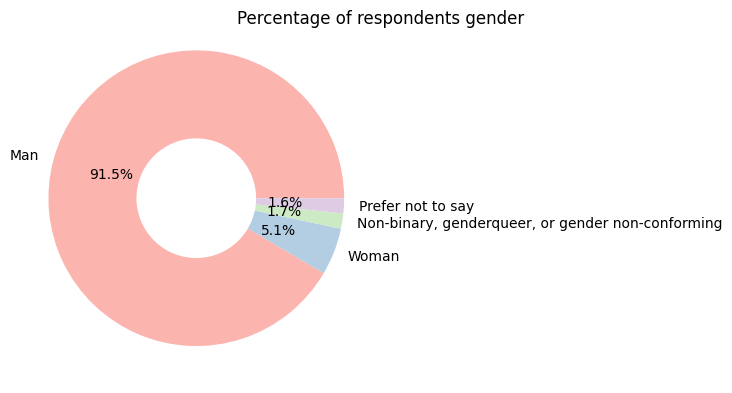

In [5]:
# I am separating options which were given by respondent because I had responds like
# Man;Or in your own words
genders = df['Gender'].str.get_dummies(';').sum()
data = genders.sort_values(ascending=False).head(4)#count the number of women and men

# Creating white circle to make pie chart looking like donut chart
white_circle = plt.Circle( (0,0), 0.4, color='white')

data.plot(kind='pie', autopct='%1.1f%%', colors=Pastel1_7.hex_colors)
p = plt.gcf()
p.gca().add_artist(white_circle)

plt.title('Percentage of respondents gender', loc='center', x=1, y=0.95)
plt.ylabel('')

plt.show()

## Country of responders
From the charts below we can see that almost every fifth stackoverflow is from the USA, and they
are the biggest group. The second-biggest group is from India. What is interesting that Poland
users are 8th biggest group worldwide and 4th european, it shows that in our country we have big
group of people interested in coding.

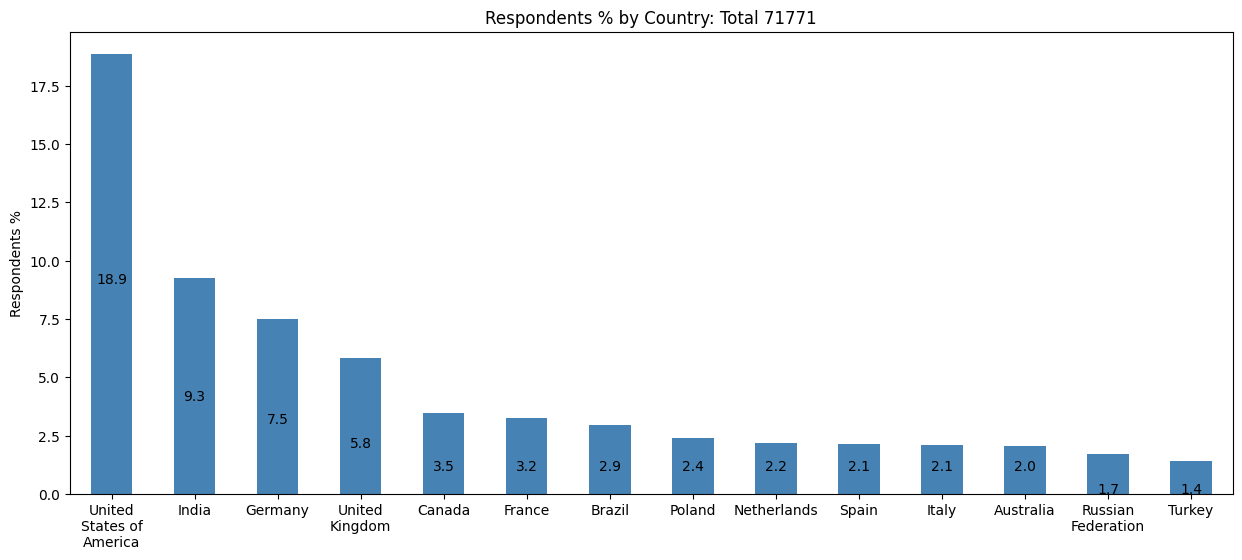

In [6]:
# Function to display values on bar
def addValuesOnBar(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

# Function to wrap text in x labels to make chart better looking
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

# Preparing data to make chart
countries_counts = df['Country'].value_counts().head(14)
countries_counts_sum = sum(df['Country'].value_counts())
countries_counts_by_percent = (countries_counts * 100) / countries_counts_sum

ax = countries_counts_by_percent.plot(kind="bar", figsize=(15,6), edgecolor=None, color="steelblue")
plt.ylabel("Respondents %")
plt.title(f"Respondents % by Country: Total {df['Country'].dropna().shape[0]}")
plt.xticks(fontsize=10)
addValuesOnBar(countries_counts.head(14), countries_counts_by_percent.round(1))
wrap_labels(ax, 12)

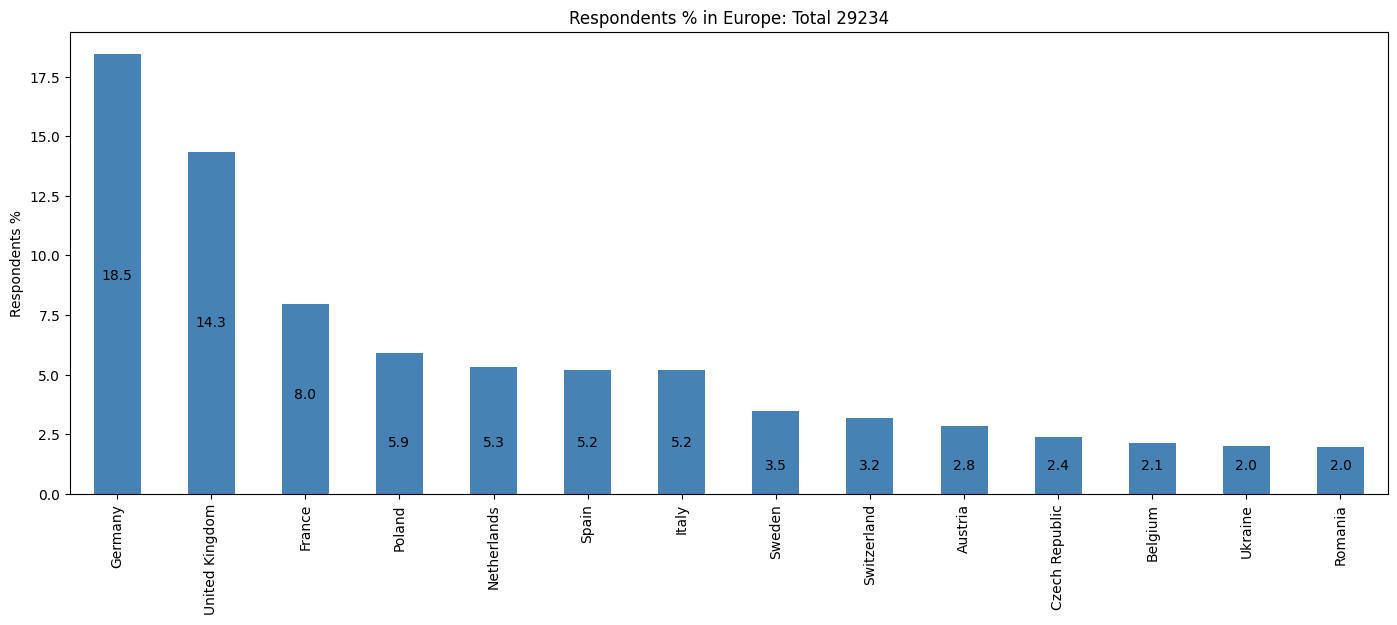

In [7]:
# Looking if respondent is from Europe
inEurope = df[df['Country'].isin(eu_countries['name'])]

# Preparing data to make chart
europe_counts_by_percent = (inEurope['Country'].value_counts().head(14) * 100) / sum(inEurope['Country'].value_counts())

ax = europe_counts_by_percent.plot(kind="bar", figsize=(17,6), edgecolor=None, color="steelblue")
plt.ylabel("Respondents %")
plt.title(f"Respondents % in Europe: Total {inEurope['Country'].dropna().shape[0]}")
plt.xticks(fontsize=10)
addValuesOnBar(inEurope['Country'].value_counts().head(14), europe_counts_by_percent.round(1))

## Programming languages users worked with
Chart below is showing us the most popular used by respondents programming languages. First two
languages are correlated with each other because usually if you are using HTML/CSS then you are
adding some JavaScript scripts to it. Third place is also correlated with them because you need
SQL to store data etc.

In [8]:
# As somewhere above I'm separating options which were multiple choice for example JavaScript;Python
coding_language_used_counts = df['LanguageHaveWorkedWith'].str.get_dummies(';').sum()
# Sorting data descending
coding_language_used_counts2 = coding_language_used_counts.sort_values(ascending=False)

fig = px.bar(coding_language_used_counts2.head(10), title="Languages respondents' worked with")

# Setting chart options
fig.update_layout(
    xaxis_title = "Language",
    yaxis_title = "Frequency",
    title_x = 0.5,
    showlegend = False
)

## Difference between time coding and coding on pro level
Chart below shows that for most users it usually took about 3 years to become pro coder
in their opinion. In my opinion it is suprising, of course it is possible to become pro in three years if you
are learning usually one language in which you are feeling the best but in IT you have to learn all the time because
new things are appearing every few weeks or months, and I thought it takes more time to become pro.

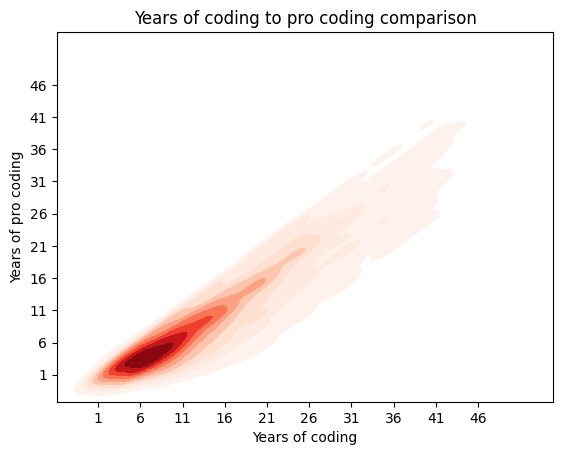

In [9]:
# Preparing data to make chart, here I had to delete rows with NaN values and delete options
# about coding more than 50 years or less than 1 year because there were few of them and they
# were spoiling the apperance of chart.
data2 = pd.DataFrame()
data2 = df.drop(df.columns.difference(['YearsCode','YearsCodePro']), 1, inplace=True)
data2 = df.dropna(subset=['YearsCode', 'YearsCodePro'])
data21 = data2[data2['YearsCode'].str.contains('More than 50 years')==False]
data22 = data21[data21['YearsCodePro'].str.contains('More than 50 years')==False]
data23 = data22[data22['YearsCode'].str.contains('Less than 1 year')==False]
data24 = data23[data23['YearsCodePro'].str.contains('Less than 1 year')==False]
data25 = data24.sort_values(by=['YearsCode', 'YearsCodePro'], ascending=True)

# Changing two columns to be numerical because they contain only numbers
data25['YearsCode'] = pd.to_numeric(data25['YearsCode'])
data25['YearsCodePro'] = pd.to_numeric(data25['YearsCodePro'])

sb.kdeplot(data = data25, x="YearsCode", y="YearsCodePro", cmap="Reds", shade=True)

# Setting plot options to display x and y labels every 5 years to better show the meaning of that point
plt.xlabel('Years of coding')
plt.xticks(np.arange(data25['YearsCode'].min(), data25['YearsCode'].max(), 5))
plt.ylabel('Years of pro coding')
plt.yticks(np.arange(data25['YearsCodePro'].min(), data25['YearsCodePro'].max(), 5))
plt.title('Years of coding to pro coding comparison', loc='center')

plt.show()

## IDEs used by users
Chart below is showing us the most popular used by respondents IDEs. As we can see first IDE Visual
Studio Code have much more users than other IDEs, that's because you can write there in almost
every programming language by installing packages. In other IDEs you are usually limited to
write in only one or few of them.

In [10]:
# Here I need to open .csv again because few cells above I changed it to have only 2 columns
df = pd.read_csv('survey_results_public.csv')
# As somewhere above I'm separating options which were multiple choice for example JavaScript;Python
ides_used_counts = df['NEWCollabToolsHaveWorkedWith'].str.get_dummies(';').sum()
# Sorting data descending
ides_used_counts2 = ides_used_counts.sort_values(ascending=False)

fig = px.bar(ides_used_counts2.head(10), title="IDEs respondents' worked with", orientation='h')

# Setting chart options
fig.update_layout(
    xaxis_title = "Frequency",
    yaxis_title = "IDE",
    title_x = 0.5,
    showlegend = False
)

## Currencies used by respondents in their day-to-day life
As we can see below most of the people who responded to the survey use two currencies,
euro and US dollar, it is not suprising because like I showed above most of them are from the
USA or from Europe

In [11]:
data3 = pd.DataFrame()
data3 = df.dropna(subset=['Currency'])
suma = sum(data3['Currency'].value_counts())

fig = px.bar(data3['Currency'].value_counts().head(5), title=f"Currencies which are used day-to-day by users. Total: {suma}")

# Setting chart options
fig.update_layout(
    xaxis_title = "Language",
    yaxis_title = "Frequency",
    title_x = 0.5,
    showlegend = False
)